<h1><center><b>GyroSpin - Caractérisation de l'assymétrie</b></center></h1>

## Import des bibliothèques

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

from scipy.optimize import curve_fit

In [2]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif"})

## Chevrons de Rabi simulés à partir des équations du mouvement

In [3]:
RabiX0 = np.loadtxt("RabiX.txt")
RabiXY0 = np.loadtxt("RabiXY.txt")
RabiX = (1 + np.cos(RabiX0)) / 2
RabiXY = (1 + np.cos(RabiXY0)) / 2

### Forçage selon $X$

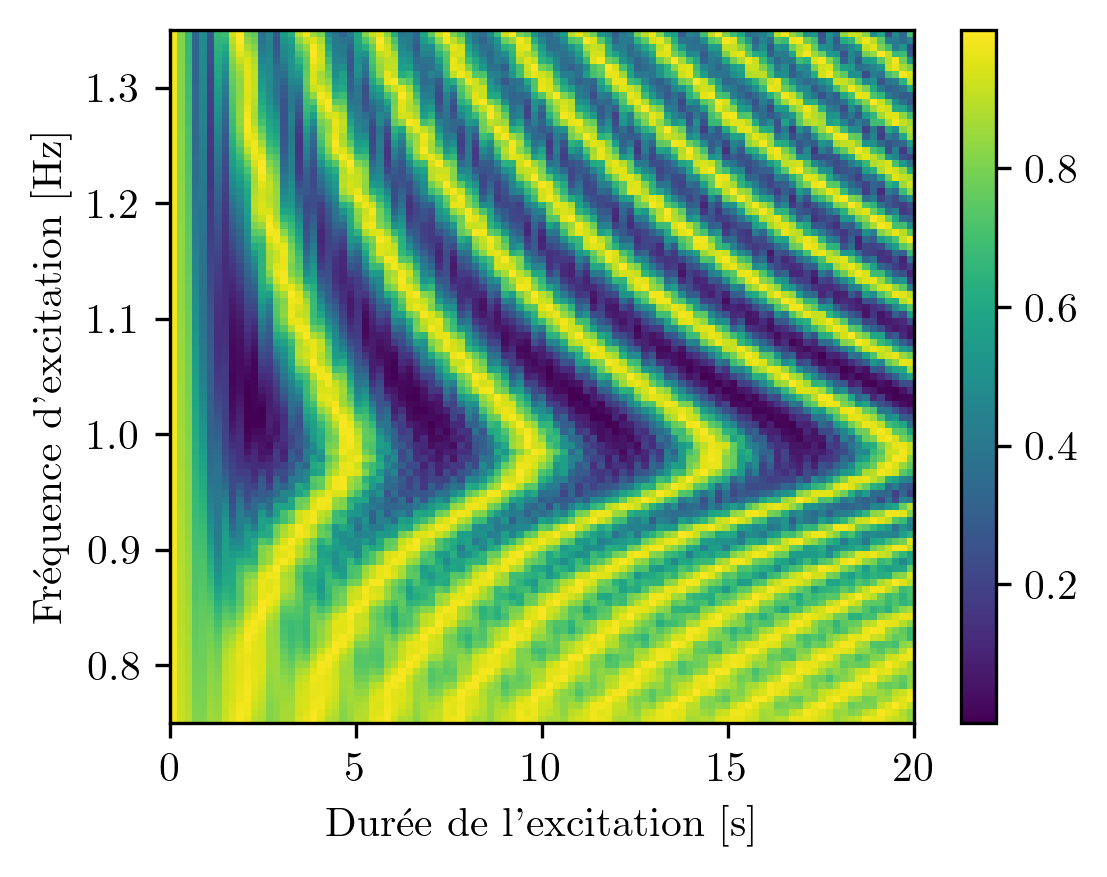

In [4]:
plt.figure(figsize=(4, 3), dpi = 300)
plt.imshow(RabiX, origin = "lower", extent=[0, 20, 0.75, 1.35], aspect="auto")
plt.xlabel("Durée de l'excitation [s]")
plt.ylabel("Fréquence d'excitation [Hz]")
plt.colorbar()
plt.savefig("RabiX_plt.png")
plt.show()

### Forçage selon $Y$

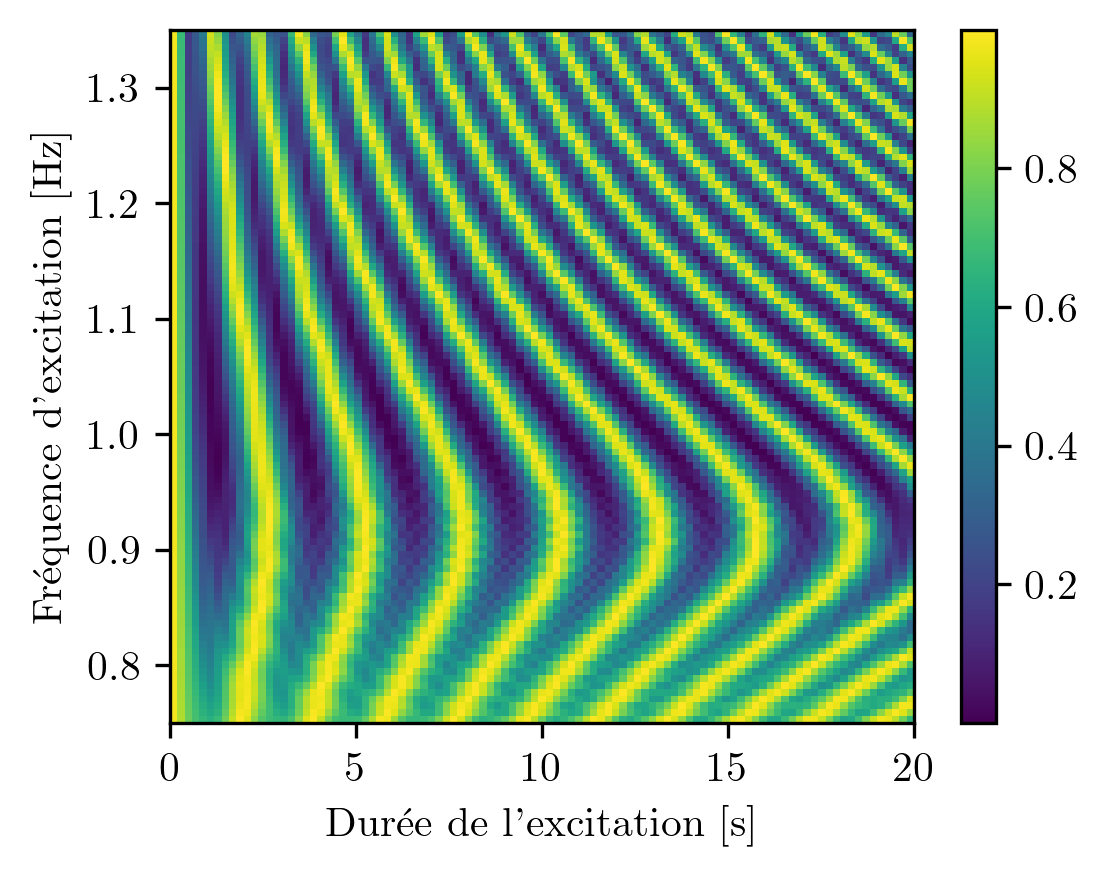

In [5]:
plt.figure(figsize=(4, 3), dpi = 300)
plt.imshow(RabiXY, origin = "lower", extent=[0, 20, 0.75, 1.35], aspect="auto")
plt.xlabel("Durée de l'excitation [s]")
plt.ylabel("Fréquence d'excitation [Hz]")
plt.colorbar()
plt.savefig("RabiXY_plt.png")
plt.show()

## Chevrons de Rabi simulées à partir de la formule

### Code de Zakaria

In [6]:
f_L_0 = 1.059
f_R_0 = f_L_0 / 4.423

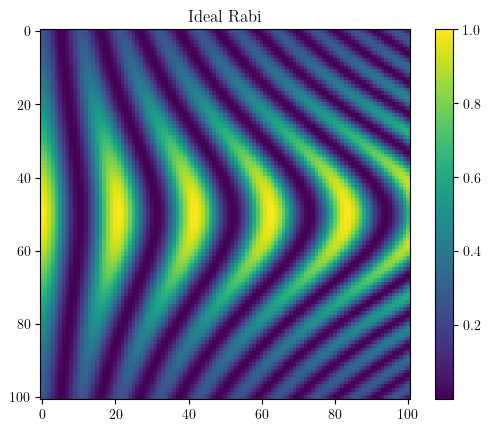

Durée d'exécution : 0.024924039840698242 s


In [7]:
def Theta_Max(delta, t):
    theta = np.zeros((len(delta), len(t)))
    for i in range(len(delta)):
        for j in range(len(t)):
            num = f_R_0**2
            den = f_R_0**2 + delta[i]**2
            W = np.sqrt( f_R_0**2 + delta[i]**2 ) / 2
            mod = np.cos(2 * np.pi * W * t[j])**2
            theta[i, j] = (num / den) * mod 
    return theta

delta = np.linspace(-0.4, 0.4, 101, endpoint=True)
t_burst = np.linspace(0, 20, 101, endpoint=True)
tab_freq = delta + f_L_0

start = time.time()
y = Theta_Max(delta, t_burst)
end = time.time()

plt.figure()
plt.imshow(y)
plt.colorbar()
plt.title("Ideal Rabi")
plt.show()

print(f"Durée d'exécution : {end - start} s")

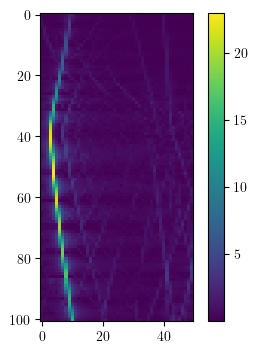

(101, 50)

In [8]:
#signal = y

signal = RabiX


n = int(len(signal) * 1)


fourier = np.fft.rfft(signal, n)

sample_rate = 10
freq_Benji = np.fft.rfftfreq(n, d=1/sample_rate)

fourier = np.delete(fourier, [0], axis=1)

plt.figure(figsize=[4 ,4])
plt.imshow(np.abs(fourier))
plt.colorbar()
plt.show()

A = np.abs(fourier)
A.shape

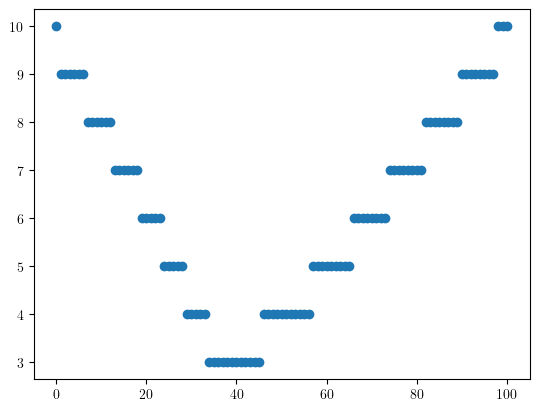

In [9]:
l = []
for k in range(101):
    A_rest = A[k, :]
    l.append(np.where(A_rest==np.max(A_rest))[0])

plt.figure()
plt.scatter(range(len(l)), l)

Durée d'exécution : 0.03383588790893555 s


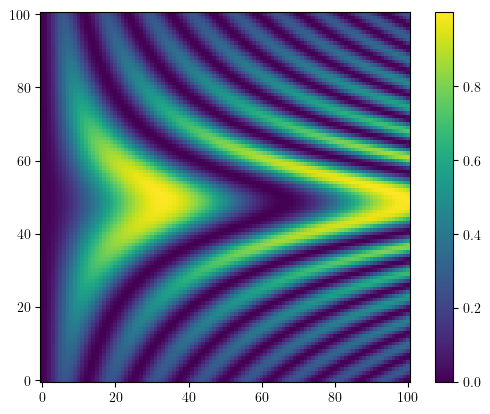

In [10]:
f_L_0 = 1.059

f_R_0 = f_L_0 / 4.423

p_psi = 0.000055 * 2 * np.pi * 50

A = 0.375 * 0.1 * 31.25 * 1e-3 / p_psi


def f_L(delta, t):
    return f_L_0 + delta * np.sinc(delta * t / np.pi)

def f_R(delta, t):
    return (( delta + f_L_0)**2) * A

def Theta_Test(delta, t):
    theta = np.zeros((len(delta), len(t)))
    for i in range(len(delta)):
        for j in range(len(t)):
            f_R_1 = f_R(delta[i], t[j])
            num = f_R_0**2
            den = f_R_0**2 + delta[i]**2
            W = np.sqrt( f_R_1**2 + delta[i]**2 ) / 2
            mod = np.sin(2 * np.pi * W * t[j])**2
            theta[i, j] = (num / den) * mod 
    return theta

start = time.time()
y1 = Theta_Test(delta, t_burst)
end = time.time()
print(f"Durée d'exécution : {end - start} s")



plt.figure()
plt.imshow(y1, origin = "lower")
plt.colorbar()
plt.show()

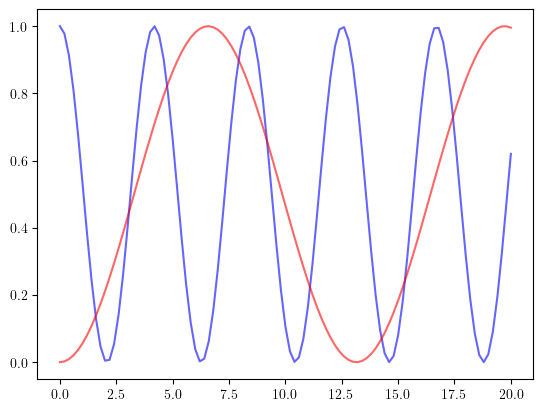

In [11]:
k = 50

#y_real = RabiX / np.pi

abs = y[k]
abs1 = y1[k, :]
#abs_real = y_real[k :]


plt.plot(t_burst, abs, 'b', alpha=0.6)
plt.plot(t_burst, abs1, 'r', alpha=0.6)
#plt.plot(abs_real, 'k', alpha=0.6)

plt.show()


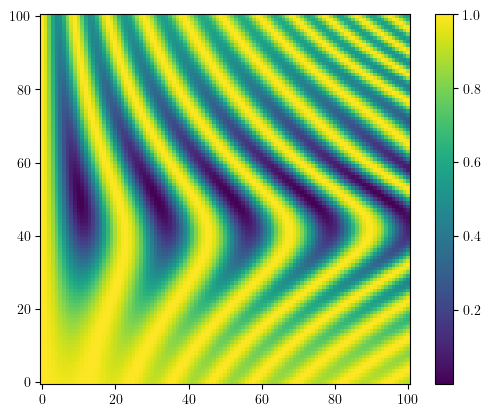

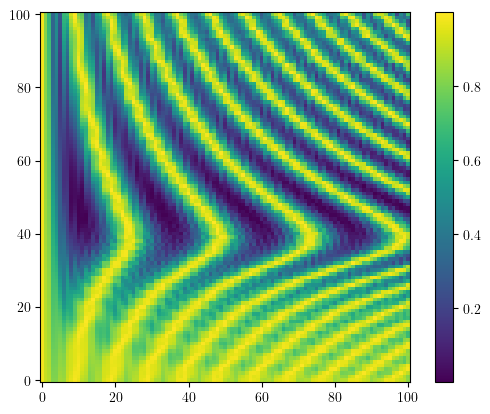

In [12]:
def f_R_test(delta, t):
    #return (1 * f_R_0) * ( (1 + delta / f_L_0)**2 ) # * np.cos(delta * t)
    return f_R_0 * (  1 + delta * (1 +  np.sinc(delta * t / np.pi)) / f_L_0  )

def bricole_freq(delta, t):
    f_L_new = f_L_0 + delta * np.sinc(delta * t / np.pi)
    f_R_new = f_R_0 * (  1 + delta * (1 +  np.sinc(delta * t / np.pi)) / f_L_0  )
    
    #return np.sqrt( f_R_0**2 + delta**2 ) / 2
    
    #www = f_R_test(delta, t) / 2
    www = f_R_new
    return np.sqrt( www**2 + delta**2 ) / 2

def Theta_svp(delta, t):
    theta = np.zeros((len(delta), len(t)))
    for i in range(len(delta)):
        for j in range(len(t)):
            f_R_1 = f_R_test(delta[i], t[j])
            num = f_R_1**2
            den = f_R_1**2 + delta[i]**2
            W = bricole_freq(delta[i], t[j])
            mod = np.sin(2 * np.pi * W * t[j])**2
            theta[i, j] = (num / den) * mod 
    return theta


y_svp = Theta_svp(delta, t_burst)

plt.figure()
plt.imshow(1-y_svp, origin = "lower")
plt.colorbar()
plt.show()


plt.figure()
plt.imshow(RabiX, origin = "lower")
plt.colorbar()


plt.show()

### Code de Sam-Rayden

In [13]:
larmor_frequency_0 = 1.059
rabi_frequency_0 = larmor_frequency_0 / 4.423

In [14]:
def calcul_theta_max0(duree_impulsion, delta):
    """
    Calcule de la colatitude maximale pour un désaccord et un instant donné.

    Entrée :
    - delta : Désaccord avec la fréqunce de résonance (f - f_0)
    - duree_impulsion : Durée de l'impulsion donné
    """

    enveloppe = rabi_frequency_0**2 / (rabi_frequency_0**2 + delta**2) 
    pulsation = np.sqrt(rabi_frequency_0**2 + delta**2) / 2
    modulation = np.cos(2 * np.pi * pulsation * duree_impulsion)**2
    theta_max = enveloppe * modulation

    return theta_max

In [15]:
delta = np.linspace(-0.4, 0.4, 101, endpoint=True)
duree_impulsion = np.linspace(0, 20, 101, endpoint=True)
duree_impulsion_mesh, delta_mesh = np.meshgrid(duree_impulsion, delta, sparse=True)

In [16]:
start = time.time()
chevron_rabi = calcul_theta_max0(duree_impulsion_mesh, delta_mesh)
end = time.time()
print(f"Durée d'exécution : {end - start} s")

Durée d'exécution : 0.0012350082397460938 s


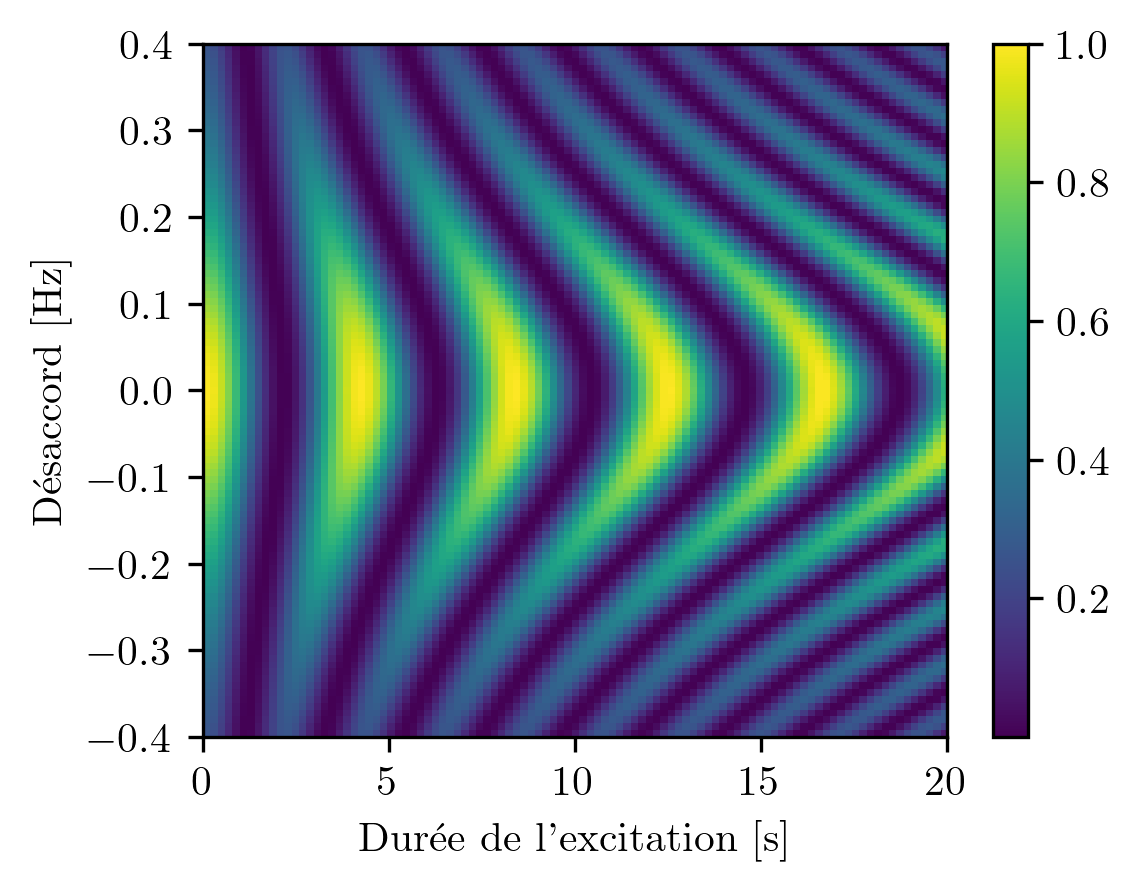

In [17]:
plt.figure(figsize=(4, 3), dpi = 300)
plt.imshow(chevron_rabi, origin = "lower", extent=[0, 20, -0.4, 0.4], aspect="auto")
plt.xlabel("Durée de l'excitation [s]")
plt.ylabel("Désaccord [Hz]")
plt.colorbar()
plt.savefig("Rabi_simu_plt.png")
plt.show()

In [18]:
n, _ = RabiX.shape
RabiX_fft = np.fft.rfft(RabiX, n)[:,1:]
RabiX_fft_mod = np.abs(RabiX_fft)
sample_rate = 10
freq_Benji = np.fft.rfftfreq(n, d=1/sample_rate)

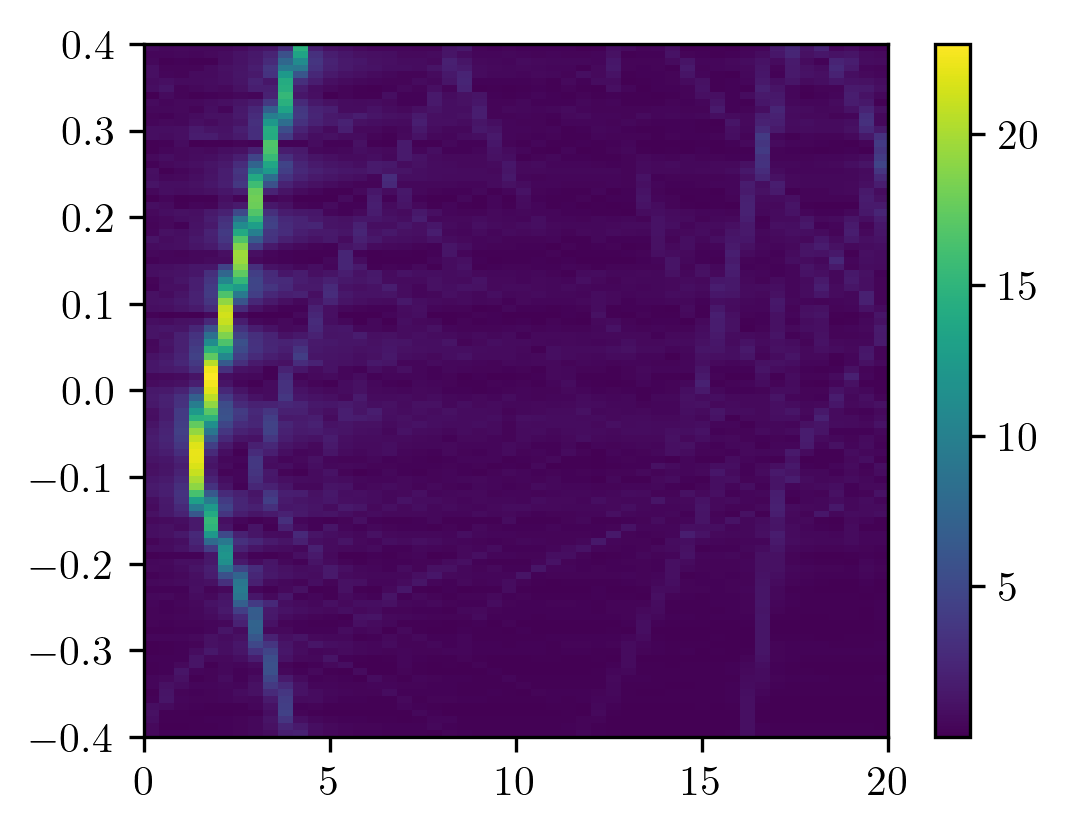

In [19]:
plt.figure(figsize=(4, 3), dpi = 300)
plt.imshow(RabiX_fft_mod, origin = "lower", extent=[0, 20, -0.4, 0.4], aspect="auto")
plt.colorbar()
plt.savefig("RabiXfft_plt.png")
plt.show()

In [20]:
maximum_array = np.argmax(RabiX_fft_mod, axis = 1)

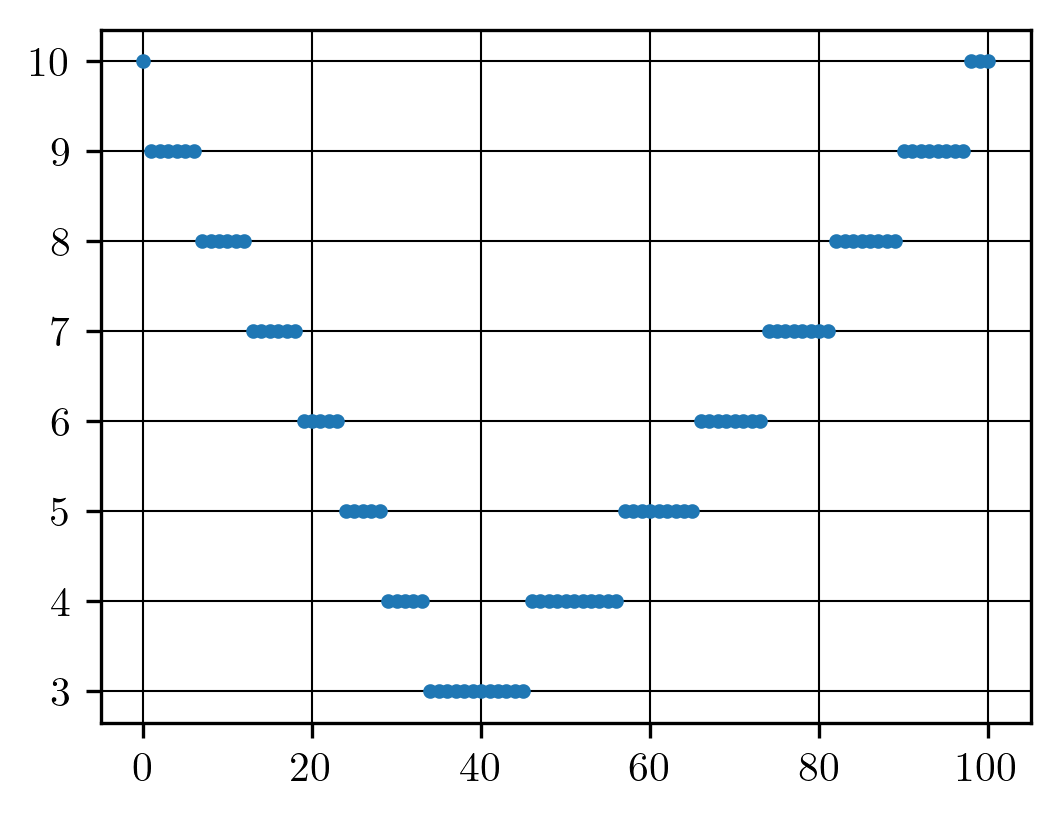

In [21]:
plt.figure(figsize=(4,3), dpi = 300)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black', zorder=1)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black', zorder=2)
plt.plot(maximum_array, "o", markersize = 2.5)

In [22]:
p_psi = 0.000055 * 2 * np.pi * 50
A = 0.375 * 0.1 * 31.25 * 1e-3 / p_psi

In [23]:
def frequence_larmor(duree_impulsion, delta):
    return larmor_frequency_0 + delta * np.sinc(delta * duree_impulsion / np.pi)

In [24]:
def frequence_rabi(delta):
    return ((delta + larmor_frequency_0)**2) * A

In [25]:
def calcul_theta_max(duree_impulsion, delta):
    """
    Calcule de la colatitude maximale pour un désaccord et un instant donné.

    Entrée :
    - delta : Désaccord avec la fréqunce de résonance (f - f_0)
    - duree_impulsion : Durée de l'impulsion donné
    """

    rabi_frequency = frequence_rabi(delta)


    enveloppe = rabi_frequency_0**2 / (rabi_frequency_0**2 + delta**2) 
    pulsation = np.sqrt(rabi_frequency**2 + delta**2) / 2
    modulation = np.cos(2 * np.pi * pulsation * duree_impulsion)**2
    theta_max = enveloppe * modulation

    return theta_max

In [26]:
start = time.time()
chevron_rabi_2 = calcul_theta_max(duree_impulsion_mesh, delta_mesh)
end = time.time()
print(f"Durée d'exécution : {end - start} s")

Durée d'exécution : 0.0009121894836425781 s


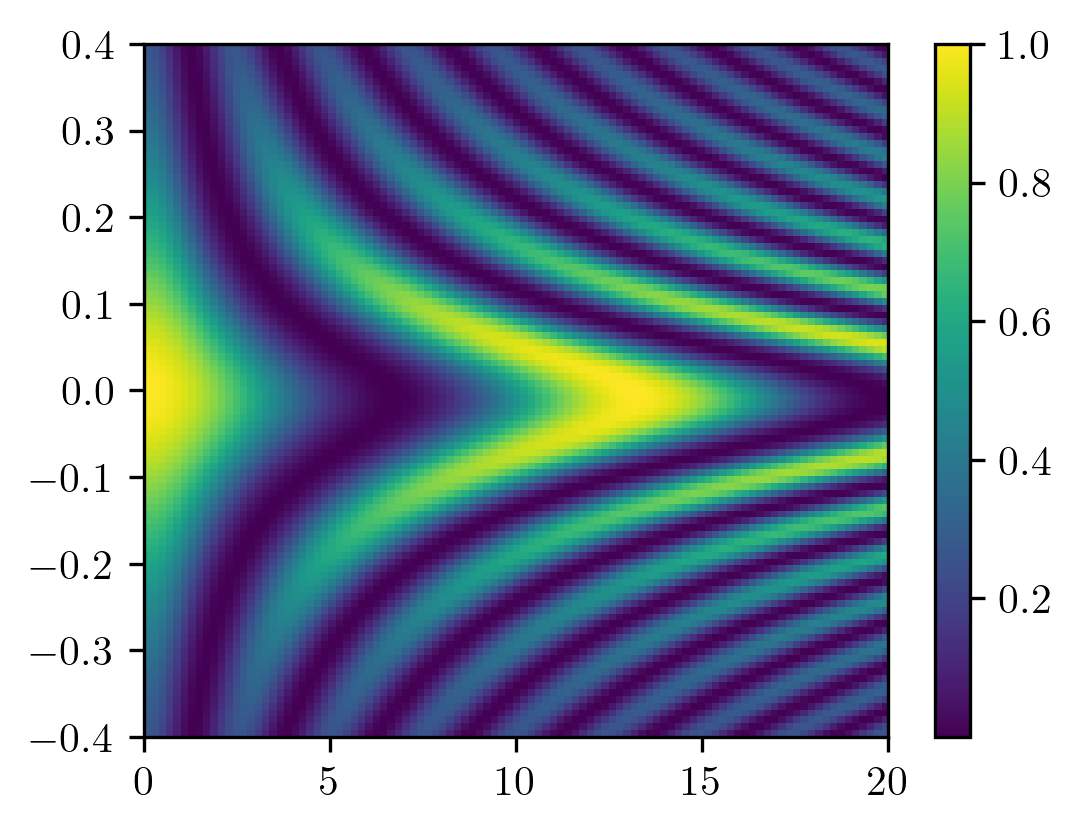

In [27]:
plt.figure(figsize=(4, 3), dpi = 300)
plt.imshow(chevron_rabi_2, origin = "lower", extent=[0, 20, -0.4, 0.4], aspect="auto")
plt.colorbar()
plt.savefig("chevron_rabi_1.png")
plt.show()

In [28]:
coupe_moitie = RabiX[50, :]

In [29]:
def modele(t, f, p):
    return (1 + np.cos(2 * np.pi * f * t + p)) / 2

In [30]:
popt, pcov = curve_fit(modele, duree_impulsion, coupe_moitie, p0 = [rabi_frequency_0, 0])

f, p = popt
f_err, p_err = np.sqrt(np.diag(pcov))

print(f"f = {f:1.2e} +/- {f_err:1.2e}")
print(f"p = {p:1.2e} +/- {p_err:1.2e}")

f = 2.39e-01 +/- 7.62e-04
p = 2.62e-01 +/- 5.61e-02


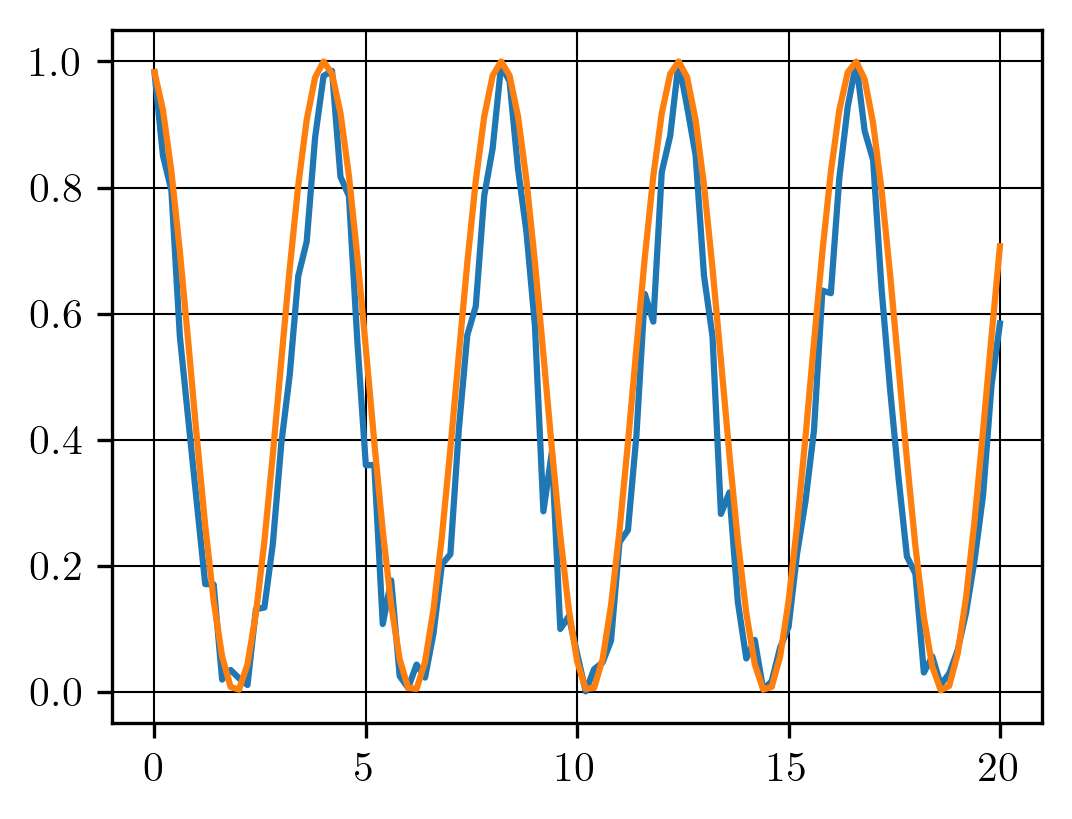

In [31]:
plt.figure(figsize=(4,3), dpi = 300)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black', zorder=1)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black', zorder=2)
plt.plot(duree_impulsion, coupe_moitie)
plt.plot(duree_impulsion, modele(duree_impulsion, *popt))
plt.show()

In [32]:
def frequence_rabi_bis(duree_impulsion, delta):
    return rabi_frequency_0 * (1 + delta * (1 +  np.sinc(delta * duree_impulsion / np.pi)) / larmor_frequency_0)

In [33]:
def calcul_theta_max_bis(duree_impulsion, delta):
    """
    Calcule de la colatitude maximale pour un désaccord et un instant donné.

    Entrée :
    - delta : Désaccord avec la fréqunce de résonance (f - f_0)
    - duree_impulsion : Durée de l'impulsion donné
    """

    rabi_frequency = frequence_rabi_bis(duree_impulsion, delta)


    enveloppe = rabi_frequency_0**2 / (rabi_frequency_0**2 + delta**2) 
    pulsation = np.sqrt(rabi_frequency**2 + delta**2) / 2
    modulation = np.cos(2 * np.pi * pulsation * duree_impulsion)**2
    theta_max = enveloppe * modulation

    return theta_max

In [34]:
start = time.time()
chevron_rabi_3 = calcul_theta_max_bis(duree_impulsion_mesh, delta_mesh)
end = time.time()
print(f"Durée d'exécution : {end - start} s")

Durée d'exécution : 0.0027163028717041016 s


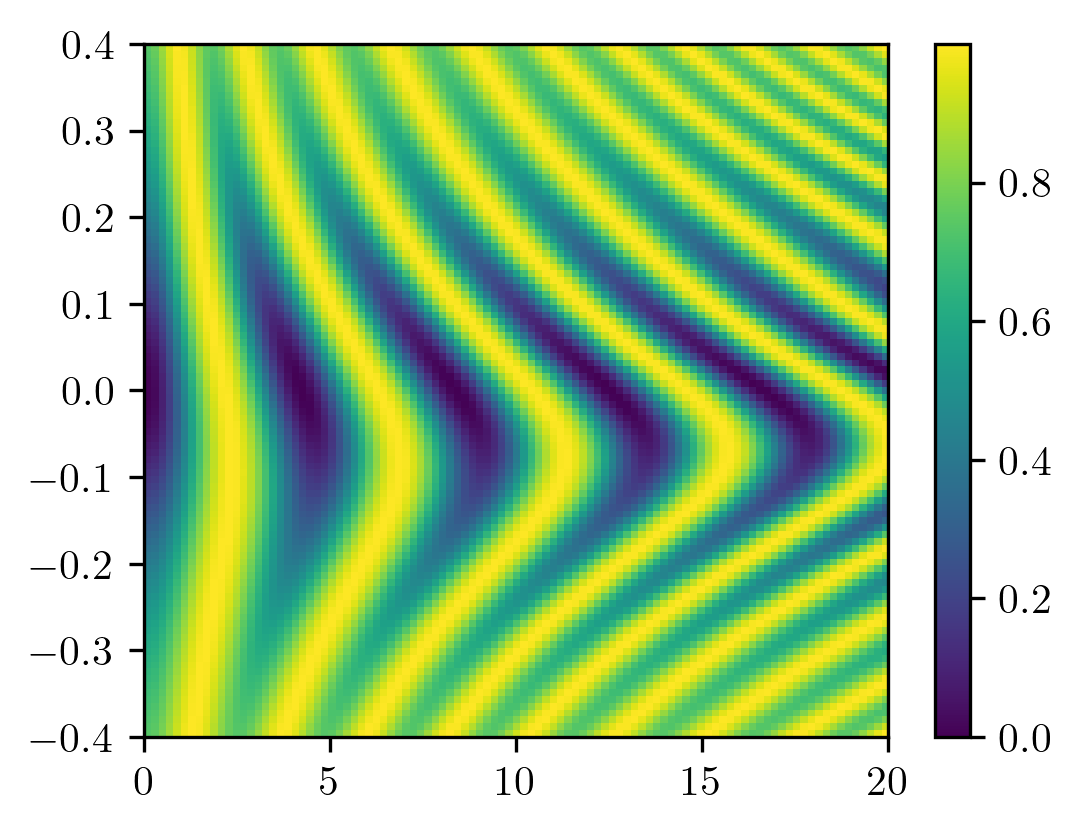

In [35]:
plt.figure(figsize=(4, 3), dpi = 300)
plt.imshow(1- chevron_rabi_3, origin = "lower", extent=[0, 20, -0.4, 0.4], aspect="auto")
plt.colorbar()
plt.savefig("chevron_rabi_2.png")
plt.show()

## Oui bon....

In [36]:
def chi(d, t):
    return d*np.sinc(d*t) * t
def chi2(d, t):
    return chi(d, t)*(1 - t ** 3) * t

In [37]:
x = np.linspace(0, 20, 100)
y = np.linspace(0.75, 1.35, 100)
xv, yv = np.meshgrid(x, y, sparse=True)
z = chi(xv, yv)
z2 = np.cos(chi2(xv, yv))

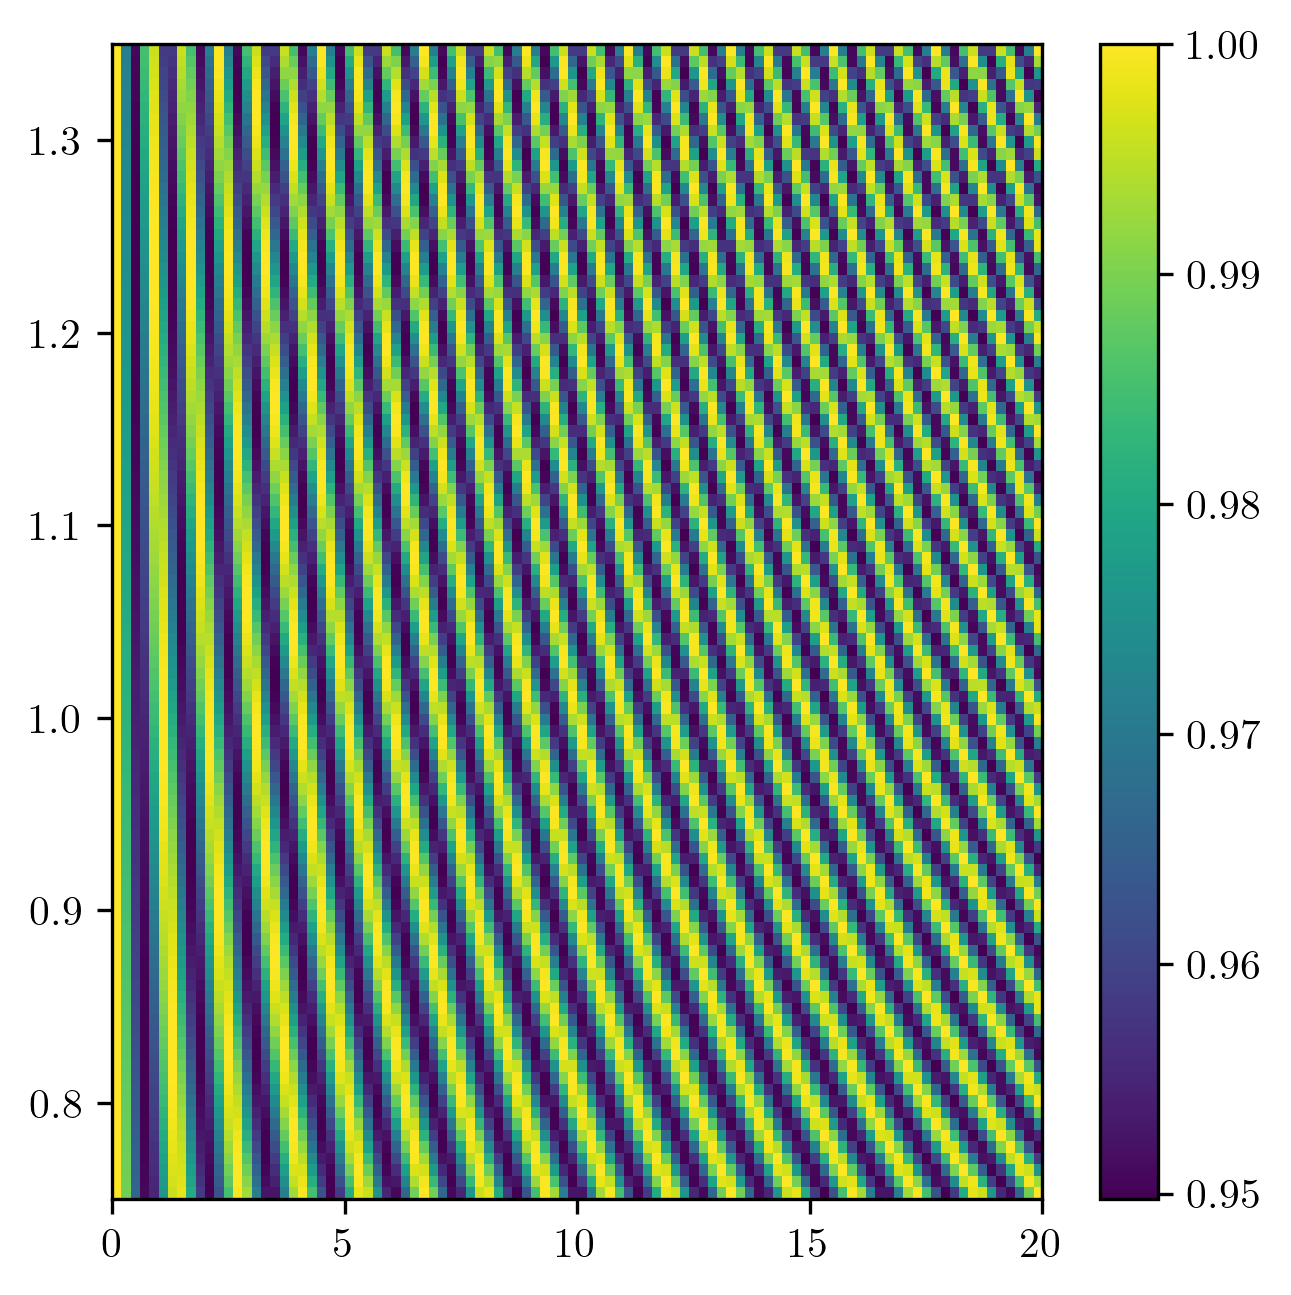

In [38]:
plt.figure(figsize=(5, 5), dpi = 300)
plt.imshow(np.cos(z), origin = "lower", extent=[0, 20, 0.75, 1.35], aspect="auto")
plt.colorbar()

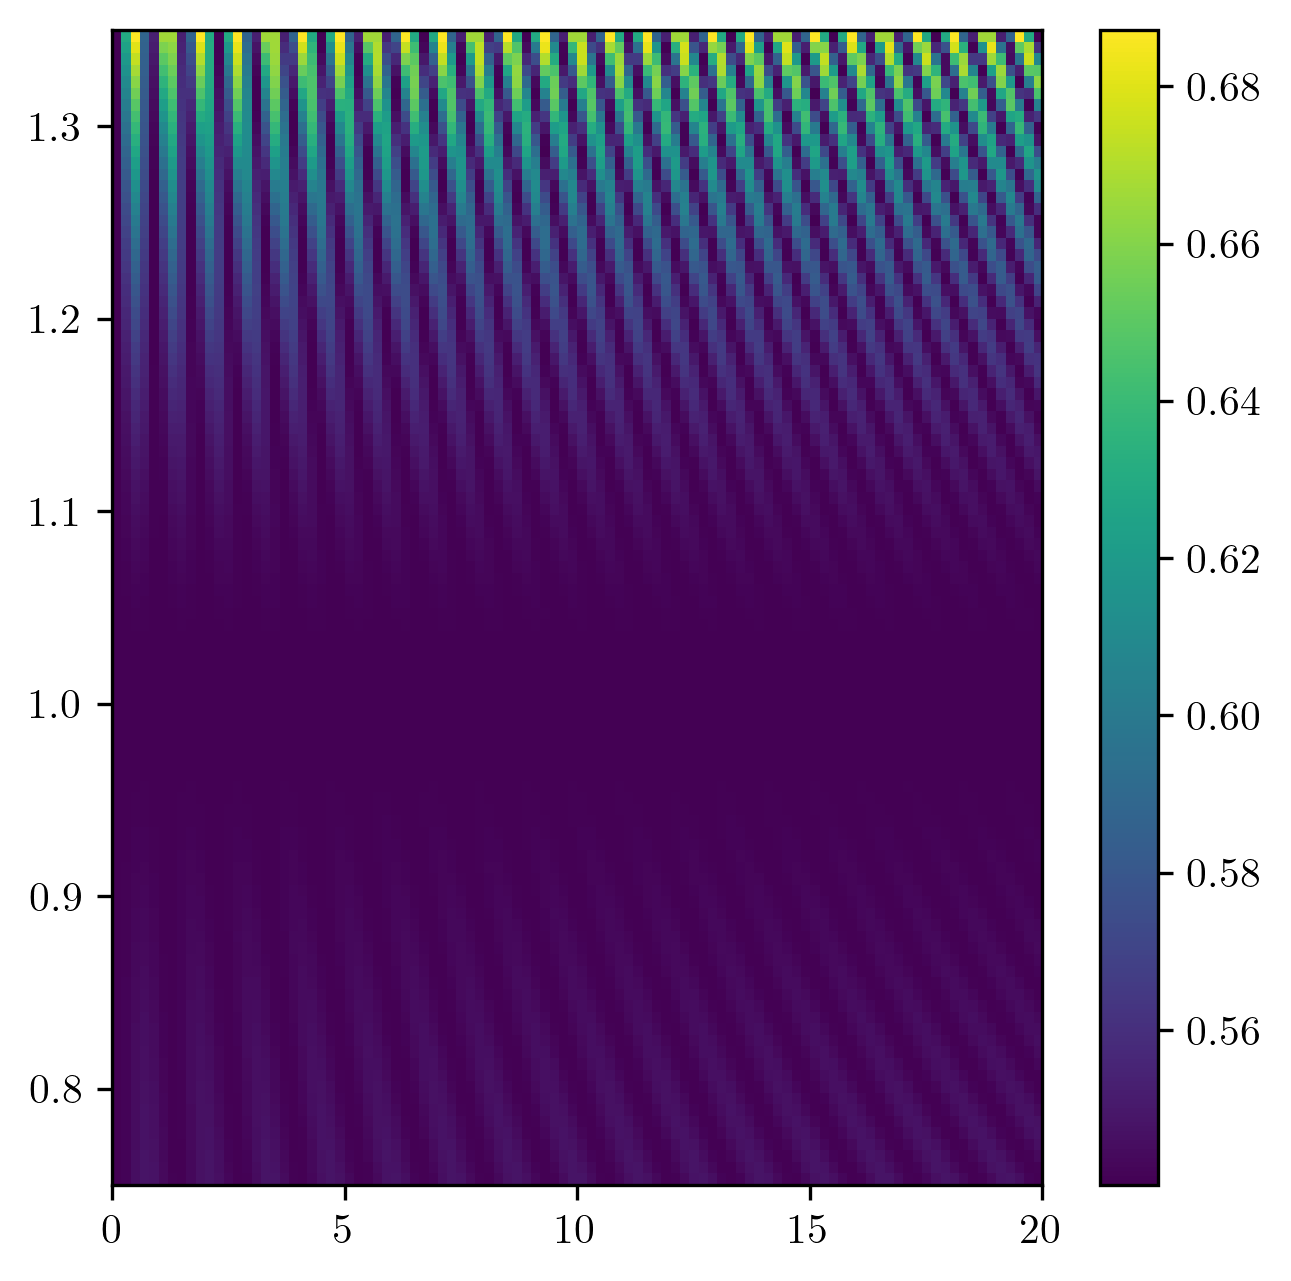

In [39]:
plt.figure(figsize=(5, 5), dpi = 300)
plt.imshow(np.cos(z2), origin = "lower", extent=[0, 20, 0.75, 1.35], aspect="auto")
plt.colorbar()